# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.simplefilter(action='ignore')

In [8]:
# od.download('https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets?select=train.csv')

# Importing Data

In [17]:
bank = pd.read_csv("D:/datasets/banking-dataset-marketing-targets/train.csv", delimiter = ';').rename(columns = {'y' : 'subscription'})
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# General Information

In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no mussing values.

In [19]:
bank[bank.duplicated(keep = False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription


There are no duplicated values.

In [20]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### Question - 1: What is theaverage number of contacts received by customers who subscribed and ones who did not?

Creating two datasets to distinguish who subscribed and who did not subscribe.

In [25]:
sub = bank[bank.subscription == 'yes']
no_sub = bank[bank.subscription == 'no']

In [27]:
sub.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


In [29]:
no_sub.describe()

,age,balance,day,duration,campaign,pdays,previous
count,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000
mean,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
std,10.172662,2974.195473,8.294728,207.383237,3.212767,96.757135,2.256771
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,58.000000,8.000000,95.000000,1.000000,-1.000000,0.000000
50%,39.000000,417.000000,16.000000,164.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,279.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


On average, who subscribed recieved more previous contacts.

#### Question - 2: Is a previous successful campaign more likely to lead to a subscription?

In [30]:
sub.poutcome.value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [31]:
no_sub.poutcome.value_counts()

unknown    33573
failure     4283
other       1533
success      533
Name: poutcome, dtype: int64

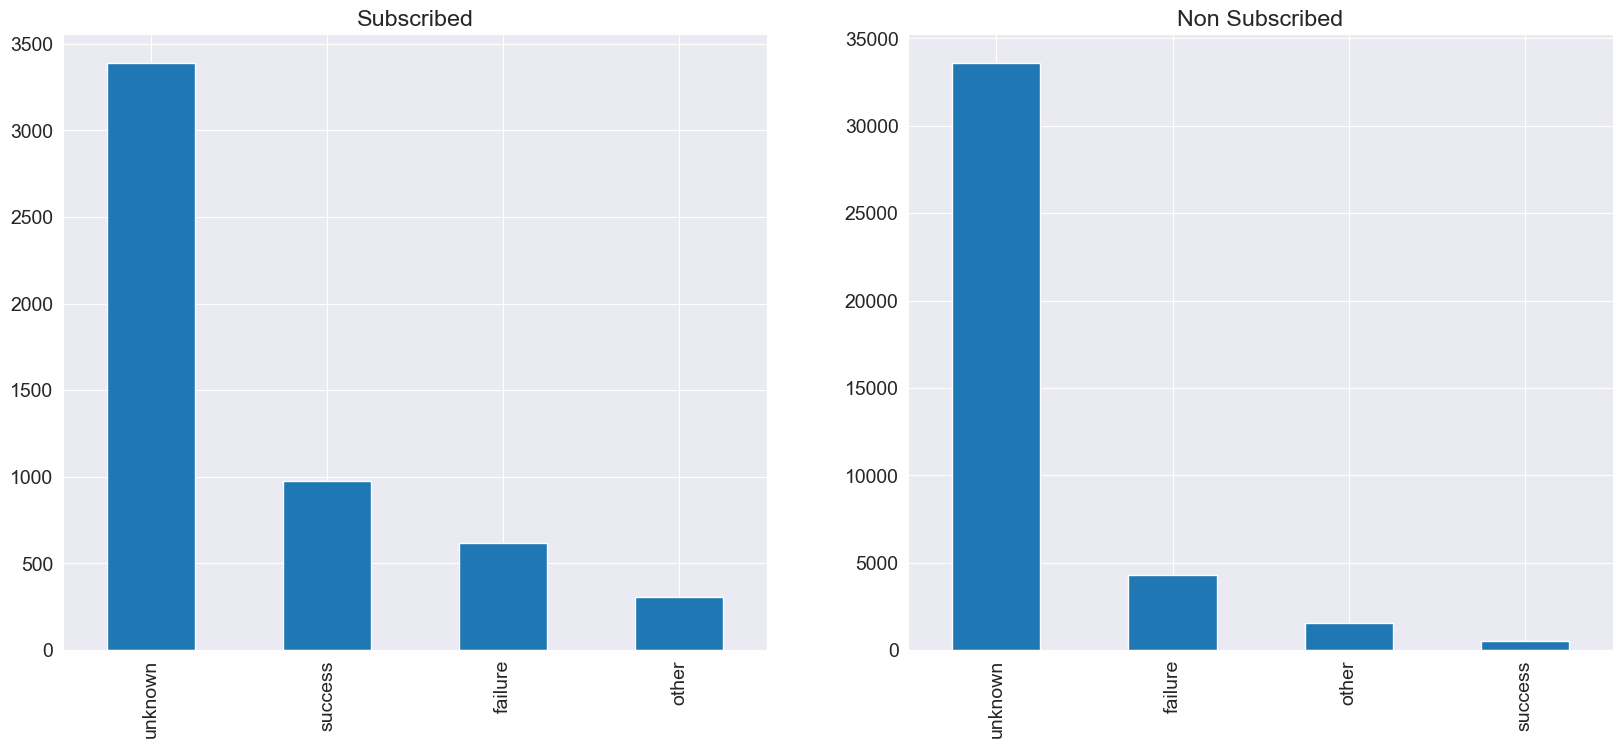

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

sub.poutcome.value_counts().plot(kind='bar', ax=ax[0], title='Subscribed')
no_sub.poutcome.value_counts().plot(kind='bar', ax=ax[1], title='Non Subscribed');

For both situations the unknown class is the most common one.

By the way, among those ones who subscribed the previous campaign had more success.

#### Qustion - 3: Which contact type is the most successful?

Dividing the number of people who subscribed with a contact type by the entire number of people
contacted with that mean.

In [33]:
(sub.contact.value_counts()/bank.contact.value_counts()).sort_values(ascending=False)

cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: contact, dtype: float64

Cellular seems to be the most successful one.

#### Question - 4: Which previous Contact month is the most frequent among those who subscribed?

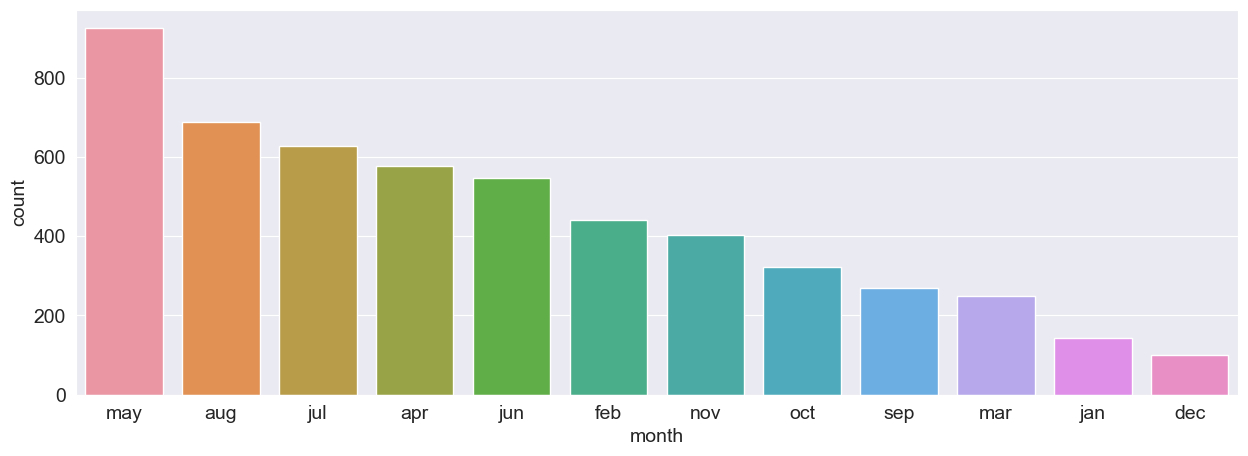

In [34]:
sns.countplot(data=sub, x='month', order=sub.month.value_counts().index);

May is the month where most subscribed.

#### Question - 5: What is the average balance of new subscribers?

In [36]:
sub.balance.describe()

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [37]:
no_sub.balance.describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

The subscribers have on average a higher balance.

# Feature Engineering

Dividing in inputs and target

In [44]:
x = bank.drop(columns = 'subscription')
y = bank.subscription

In [45]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [46]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: subscription, Length: 45211, dtype: object

#### 1. Defining Categorical and Numerical Columns

In [47]:
numerical_cols = x.select_dtypes(include=np.number).columns.to_list()
categorical_cols = x.select_dtypes(include='object').columns.to_list()

In [49]:
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [50]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### 2. Scaling Numerical Columns

In [55]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(x[numerical_cols])
x[numerical_cols] = scaler.transform(x[numerical_cols])

In [56]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.266667,management,married,tertiary,no,1.250000,yes,no,unknown,-0.846154,may,0.375000,-0.5,0.0,0.0,unknown
1,0.333333,technician,single,secondary,no,-0.308997,yes,no,unknown,-0.846154,may,-0.134259,-0.5,0.0,0.0,unknown
2,-0.400000,entrepreneur,married,secondary,no,-0.328909,yes,yes,unknown,-0.846154,may,-0.481481,-0.5,0.0,0.0,unknown
3,0.533333,blue-collar,married,unknown,no,0.780236,yes,no,unknown,-0.846154,may,-0.407407,-0.5,0.0,0.0,unknown
4,-0.400000,unknown,single,unknown,no,-0.329646,no,no,unknown,-0.846154,may,0.083333,-0.5,0.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.800000,technician,married,tertiary,no,0.278024,no,no,cellular,0.076923,nov,3.689815,0.5,0.0,0.0,unknown
45207,2.133333,retired,divorced,primary,no,0.944690,no,no,cellular,0.076923,nov,1.277778,0.0,0.0,0.0,unknown
45208,2.200000,retired,married,secondary,no,3.884218,no,no,cellular,0.076923,nov,4.384259,1.5,185.0,3.0,success
45209,1.200000,blue-collar,married,secondary,no,0.162242,no,no,telephone,0.076923,nov,1.518519,1.0,0.0,0.0,unknown


#### 3. One-Hot Encoding Categorial Columns

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False).fit(x[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
x[encoded_cols] = encoder.transform(x[categorical_cols])

In [59]:
x.drop(columns=categorical_cols, inplace=True)

#### 4. Changing "yes" and "no" into 0 and 1

In [60]:
subs_dict = {'no':0, 'yes':1}
y = y.map(subs_dict)
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: subscription, Length: 45211, dtype: int64

# Splitting the Dataset

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.20, random_state=42)

# Creating the Machine Learning Model

In [85]:
from xgboost import XGBClassifier
ml_model = XGBClassifier(n_jobs=-1, n_estimators=1000, early_stopping_rounds=50, random_state=42)
ml_model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)])

[0]	validation_0-logloss:0.50882	validation_1-logloss:0.51269
[1]	validation_0-logloss:0.40632	validation_1-logloss:0.41326
[2]	validation_0-logloss:0.34284	validation_1-logloss:0.35205
[3]	validation_0-logloss:0.30024	validation_1-logloss:0.31194
[4]	validation_0-logloss:0.27136	validation_1-logloss:0.28540
[5]	validation_0-logloss:0.25087	validation_1-logloss:0.26762
[6]	validation_0-logloss:0.23562	validation_1-logloss:0.25386
[7]	validation_0-logloss:0.22489	validation_1-logloss:0.24418
[8]	validation_0-logloss:0.21467	validation_1-logloss:0.23446
[9]	validation_0-logloss:0.20816	validation_1-logloss:0.22900
[10]	validation_0-logloss:0.20238	validation_1-logloss:0.22402
[11]	validation_0-logloss:0.19811	validation_1-logloss:0.22068
[12]	validation_0-logloss:0.19492	validation_1-logloss:0.21786
[13]	validation_0-logloss:0.19257	validation_1-logloss:0.21655
[14]	validation_0-logloss:0.19002	validation_1-logloss:0.21482
[15]	validation_0-logloss:0.18766	validation_1-logloss:0.21355
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [88]:
ml_model.best_ntree_limit

59

In [89]:
ml_model = XGBClassifier(n_jobs=-1, n_estimators=59, random_state=42)
ml_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=59, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

**Checking the accuracy below**

In [90]:
from sklearn.metrics import accuracy_score
print('Train Accuracy: {}'.format(accuracy_score(y_train, ml_model.predict(x_train))))
print('Validation Accuracy: {}'.format(accuracy_score(y_val, ml_model.predict(x_val))))

Train Accuracy: 0.9421311656713116
Validation Accuracy: 0.9086586309852925


**Checking the classification report below.**

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_val, ml_model.predict(x_val)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043



# Dataset Balancing

It will be used SMOTE.

In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
# Creating two new x and y with SMOTE
x_sm, y_sm = smote.fit_resample(x,y)

In [94]:
x_sm

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.266667,1.250000,-0.846154,0.375000,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.333333,-0.308997,-0.846154,-0.134259,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.400000,-0.328909,-0.846154,-0.481481,-0.500000,0.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.533333,0.780236,-0.846154,-0.407407,-0.500000,0.0,0.0,0.000000,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.400000,-0.329646,-0.846154,0.083333,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,-0.234479,0.117533,0.679026,1.798557,7.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79840,-0.727207,2.381596,-0.461538,0.377340,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79841,1.732977,0.713115,0.220544,2.493867,0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79842,-0.628865,0.056767,-0.551944,2.327700,-0.195878,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
79839    1
79840    1
79841    1
79842    1
79843    1
Name: subscription, Length: 79844, dtype: int64

**Seeing the difference below.**

In [96]:
y.value_counts()

0    39922
1     5289
Name: subscription, dtype: int64

In [97]:
y_sm.value_counts()

0    39922
1    39922
Name: subscription, dtype: int64

Now classes are balanced.

#### Splitting

In [98]:
x_train_sm, x_val_sm, y_train_sm, y_val_sm = train_test_split(x_sm, y_sm, stratify=y_sm ,test_size=0.20, random_state=42)

#### Creating the Model

In [100]:
ml_model_sm = XGBClassifier(n_jobs=-1, n_estimators=1000, early_stopping_rounds=50, random_state=42)
ml_model_sm.fit(x_train_sm, y_train_sm, eval_set=[(x_train_sm, y_train_sm), (x_val_sm, y_val_sm)])

[0]	validation_0-logloss:0.55046	validation_1-logloss:0.55090
[1]	validation_0-logloss:0.46850	validation_1-logloss:0.46968
[2]	validation_0-logloss:0.41424	validation_1-logloss:0.41671
[3]	validation_0-logloss:0.37553	validation_1-logloss:0.37947
[4]	validation_0-logloss:0.34785	validation_1-logloss:0.35247
[5]	validation_0-logloss:0.31682	validation_1-logloss:0.32196
[6]	validation_0-logloss:0.29735	validation_1-logloss:0.30297
[7]	validation_0-logloss:0.28472	validation_1-logloss:0.29067
[8]	validation_0-logloss:0.26181	validation_1-logloss:0.26769
[9]	validation_0-logloss:0.25189	validation_1-logloss:0.25811
[10]	validation_0-logloss:0.24267	validation_1-logloss:0.24892
[11]	validation_0-logloss:0.23237	validation_1-logloss:0.23934
[12]	validation_0-logloss:0.22065	validation_1-logloss:0.22828
[13]	validation_0-logloss:0.21101	validation_1-logloss:0.21917
[14]	validation_0-logloss:0.20567	validation_1-logloss:0.21425
[15]	validation_0-logloss:0.19894	validation_1-logloss:0.20772
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [101]:
ml_model_sm.best_ntree_limit

167

In [102]:
ml_model_sm = XGBClassifier(n_jobs=-1, n_estimators=183, random_state=42)
ml_model_sm.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=183, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

**Checking the accuracy below.**

In [103]:
print('Train Accuracy: {}'.format(accuracy_score(y_train_sm, ml_model_sm.predict(x_train_sm))))
print('Validation Accuracy: {}'.format(accuracy_score(y_val_sm, ml_model_sm.predict(x_val_sm))))

Train Accuracy: 0.9803835616438357
Validation Accuracy: 0.9474607051161625


**Checking the Classification Report below.**

In [104]:
print(classification_report(y_val, ml_model.predict(x_val)))
print(classification_report(y_val_sm, ml_model_sm.predict(x_val_sm)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7985
           1       0.95      0.94      0.95      7984

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



**THE PERFORMANCE HAS IMPORVED A LOT!!!**